# Uygulama Notları: 10
## FİZ219 - Bilgisayar Programlama I | 11/01/2020
**Gauss eleme yöntemi ile n bilinmeyenli n -doğrusal- denklemin çözümü**
* Doğrusal (Lineer) Denklemler
  * Doğru denklemi olarak doğrusal denklemler
  * Her iki bilinmeyenli iki denklemin mutlaka çözümü var mıdır?
  * Problemin Tanımı
* Gauss Eleme Yöntemi
    * İki bilinmeyenli iki denklem sistemi
        * Özel Çözüm (Örnek)
        * Genel Çözüm
    * Üç bilinmeyenli üç denklem sistemi
    * Genele sistematik uygulama
        * İleriye eleme aşaması
        * Geriye yerine yerleştirme aşaması
        * Fonksiyonlaştıramadıklarımızdan mısınız?
* Uygulamalar
    1. Uygulama: Sürtünmeli Hareket  
       Özet kod
    2. Uygulama: Kirchoff Yasası  
       Aaaaaa çözüm patladı!!!
* Birkaç ufak not, soru, tavsiye
    * Soru(n)
    * "Bunu yapan komut zaten var" (hem de bir sürü!)
    * Naif, temiz kalpli, saf Gauss eleme yöntemi
    * Elimizde gerçekte kaç adet denklem var?

Emre S. Tasci emre.tasci@hacettepe.edu.tr

# Doğrusal (Lineer) Denklemler
   ## Doğru denklemi olarak doğrusal denklemler
Doğrusal denklemler, en büyük kuvvetin 1 olduğu denklemlere verilen addır (bir doğrunun denklemini tanımladıkları için). Örneğin: $y=m x + n$ denklemi, parametreleri olan $x$'in de, $y$'nin de kuvvetinin 1 olmasından ötürü eğimi $m$ olup, y eksenini $n$ değerinde kesen bir doğruyu verir:

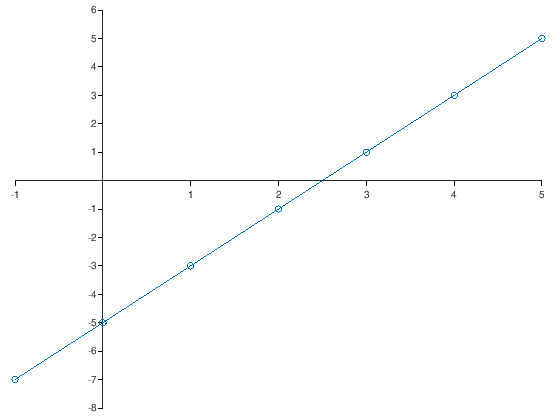

In [1]:
# y = 2x - 5 denklemini cizdirelim

m = 2;
n = -5;
x = linspace(-1,5,7);
y = m*x + n;
plot(x,y,"-o");

# Bu alttakiler grafigimiz guzel gorunsun diye 8)
set(gca, "xaxislocation", "origin")
set(gca, "yaxislocation", "origin")
set(gca, "box", "off")
yticks(-8:6)

Yukarıdaki grafikte, $y = 2x - 5$ doğrusunun üzerindeki **her nokta** (rasyonel, irrasyonel, tam, kesirli) bu denklemi sağlar. 

Bir denklem daha ele alıp, onu da çizdirelim, örneğin: $y = -3x + 5$ olsun:

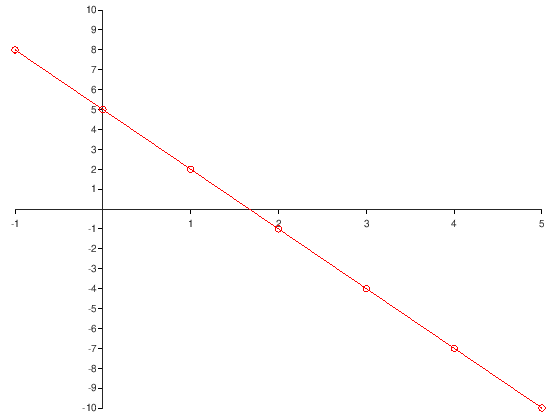

In [2]:
# y = -3x + 5 denklemini cizdirelim

m = -3;
n =  5;
x = linspace(-1,5,7);
y = m*x + n;
plot(x,y,"-or");

# Bu alttakiler grafigimiz guzel gorunsun diye 8)
set(gca, "xaxislocation", "origin")
set(gca, "yaxislocation", "origin")
set(gca, "box", "off")
yticks(-10:10)

Doğal olarak, bu doğrunun üzerine yer alan tüm noktalar da $y = -3x + 5$ denklemini sağlamaktadır.

Elimizdeki iki doğruyu bu sefer de birlikte, aynı grafikte çizelim:

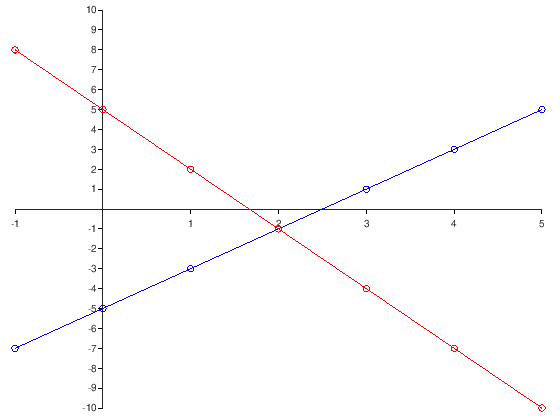

In [3]:
x = linspace(-1,5,7);
y1 =  2*x - 5;
y2 = -3*x + 5;

plot(x,y1,"-ob",x,y2,"-or");

set(gca, "xaxislocation", "origin")
set(gca, "yaxislocation", "origin")
set(gca, "box", "off")
yticks(-10:10)

Görüldüğü üzere, bu iki doğru, birbirini $(x,y) = (2,-1)$ noktasında kesiyor. Öklid'in aksiyomları uyarınca, iki farklı doğrunun -birbirlerine paralel değillerse- birbirlerini sadece ve sadece 1 noktada keseceklerini zaten biliyorduk.

Hızlıca bir kontrol yapıp, önce 1., sonra 2. denklemde x yerine "2" yazalım:

1. Denklem:  $2\cdot(2) - 5 = -1 = y$
2. Denklem: $-3\cdot(2) + 5 = -1 = y$

Gerçekten de (2,-1) özel noktası, iki doğrunun da üzerinde yer alıyor. Böylelikle, çok fark ettirmeden, iki bilinmeyenli {(x,y)} iki doğrusal denklemi ($y = 2x - 5$ ve $y=-3x + 5$ denklemlerini) böylelikle çözmüş olduk!

### Her iki bilinmeyenli iki denklemin mutlaka çözümü var mıdır?
Doğrudan cevap vermek yerine, şu iki denklemi ele alalım:

$$ y = 2x -1$$

$$ y = 2x +1$$

Hemen grafiklerini çizdirelim:

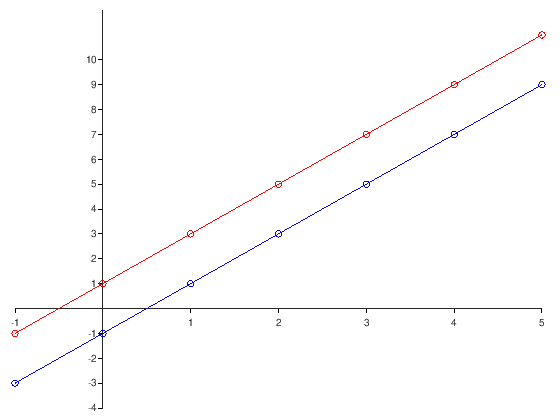

In [4]:
x = linspace(-1,5,7);
y1 = 2*x - 1;
y2 = 2*x + 1;

plot(x,y1,"-ob",x,y2,"-or");

set(gca, "xaxislocation", "origin")
set(gca, "yaxislocation", "origin")
set(gca, "box", "off")
yticks(-10:10)

Çizince ortaya çıktığı üzere, bu iki doğru birbirine paralel olduğundan, Öklid aksiyomları uyarınca _sonsuzda kesişirler_ (yani hiç kesişmezler). Paralelliklerini aynı eğime sahip olmalarından ($m=2$) anlayabiliriz. Demek ki, iki bilinmeyenli iki denklemin, **eğimleri eşit değilse bir çözümü vardır**. 

## Problemin Tanımı
Elimizde her 2 bilinmeyenli 2 denklem bulduğumuzda doğal olarak grafik çizip, kesiştikleri noktaları saptayamayacağımızdan ötürü, biraz daha sistematik olmak durumundayız. Genelleştirmek gerekirse, _m_ bilinmeyenli _n_ doğrusal denklem takımından bahsetmekteyiz. Bu denklem takımları _m_ ve _n_'in birbirlerine olan büyük, küçük, eşit durumlarına göre üçe ayrılır:

1. **Yetersiz Tanımlı Doğrusal Takım ($m>n$):** Bilinmeyen sayısı _m_'in, denklem sayısından fazla olması durumunda, denklem takımını sağlayan sonsuz tane çözüm olur. 
2. **Bağımsız Doğrusal Takım ($m = n$):** Bilinmeyen sayısı denklem sayısına eşitse, her bir bilinmeyenin bütün denklemleri sağlayan sadece bir adet değeri olacaktır.
3. **Aşırı Tanımlı Doğrusal Takım ($m < n$):** Denklem sayısının bilinmeyen sayısından fazla olması durumunda ortaya çıkan bu takımda, çözüm olmasa da, gerçek hayatta genel olarak bu türden denklem takımları ile ilgilendiğimizden, elimizdeki denklemleri mümkün mertebe sağlayan değerleri bulmaya çalışırız. Bu tür denklem takımlarına örnek olarak çeşitli kütleleri (${m_i}$) bir tartıya koyup, ağırlıklarını (${F_i}$) ölçtüğümüz bir deney yaptığımızı düşünelim: gerek ortamdan, gerekse tartıdaki hassasiyet ve hatalardan dolayı hiçbir zaman tam olarak: $$F_i = m_i g$$ bulamayız, onun yerine mesela şöyle bir veri setimiz olabilir:
   
   
   
  |$m_i$ (kg)  |$F$ (N)  |
    |:---|:---:|
    |1.0000   |10.1918|
    |2.0000   |23.2071|
    |3.0000   |33.3248|
    |4.0000   |42.3553|
    |5.0000   |56.3806|
    
Teoride $F = m\cdot g$ olduğunu biliyoruz ama pratikte bu pek doğrulanmıyor. Elimizde 1 bilinmeyen (g) var ama 5 tane denklem var. Grafiğini çizdirirsek:

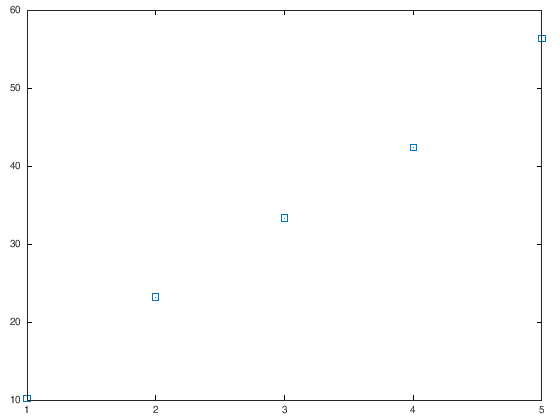

In [5]:
m = 1:5;
F = [10.1918   23.2071   33.3248   42.3553   56.3806];
plot(m,F,"s")

Bu noktaların hepsinden geçebilecek bir doğrunun olmadığı apaçık ama bunun çözümünü de "bütün noktalara mümkün mertebe en yakından geçen doğru"nun denklemini bularak hallettik ("FİZ219 Bilgisayar Programlama I Dersi Uygulama Notları: #5 - En küçük kareler yöntemi").

Biz bu notlarda, bilinmeyen sayısının, bağımsız denklem sayısına eşit olduğu "Bağımsız Doğrusal Denklem Takımları" ile ilgileneceğiz. Çok temel olduğu için onlarca çözüm yöntemi var (ilgilenenler için: bunların başlıcalarını "FİZ353 Numerical Analysis Course Lecture Notes #10 - Solving Systems of Linear Equations" ders notlarında bulabilirsiniz), biz bu yöntemlerden Gauss eleme yöntemini ele alacağız.

## Gauss Eleme Yöntemi
### İki bilinmeyenli iki denklem sistemi
**Özel Çözüm (Örnek)**

Elimizde $$5y = 2x+8\\4y=3x + 5$$ 

şeklinde iki bilinmeyenli, iki denklemimiz olsun. Bu denklemleri düzenleyip:

\begin{align}(1):\;2x - 5y &= -8\\(2):\;-3x+4y&=5\end{align}

olarak yazalım. Denklemlerin solunu da, sağını da aynı sayıyla çarparsak/bölersek, aynı sayıyı eklersek/çıkarırsak, kısacası iki tarafa da aynı matematiksel işlemi uygularsak eşitlik bozulmaz. O halde biz de 1. denklemi önce 2'ye bölelim (böylelikle x'in katsayısı 1 olur); ardından (2. denkleme doğrudan eklediğimizde ondaki "-3x"ü götürmesi için) 3 ile çarpıp 2. denkleme ekleyelim:

\begin{align}\frac{3}{2}\times(1)&:\;\frac{3}{2}\left[2x - 5y = -8 \right]\rightarrow 3x - \frac{15}{2}y = -12\\
\frac{3}{2}\times(1)+(2)&:\;\left[3x - \frac{15}{2}y = -12\right] + \left[-3x+4y=5\right]\\&=\left(3-3\right)x +\left(- \frac{15}{2}+4\right)y = \left(-12+5\right)\\&\frac{-7}{2}y=-7\\&\Rightarrow y = 2\end{align}

artık y değerine bildiğimize göre, iki denklemden birine bunu koyup, x'i bulabiliriz. 1. denklemi kullanalım: $$2x-5\cdot(2) = -8\rightarrow x=\frac{-8+10}{2} = 1$$

Demek ki çözüm setimiz: $(x,y) = (1,2)$ imiş.

**Genel Çözüm**

Elimizde: $$(1):\;a_{11} x + a_{12} y = b_1 \\(2):\;a_{21} x + a_{22} y = b_2$$ 

şeklinde iki bilinmeyenli, iki denklemimiz olsun ($a$'lar ve $b$'ler verilmiş durumda, biz $x$ ve $y$yi bulmaya çalışıyoruz). Her seferinde ayrı ayrı $x$'i ve $y$'yi yazmamak için katsayılarını matrise tanımlayıp oradan devam edelim ($b$'leri de matrise katarsak şöyle bir durum oluyor):

$$a_{11} x + a_{12} y = b_1 \\a_{21} x + a_{22} y = b_2\\\Rightarrow \begin{bmatrix}a_{11}&a_{12}&\|& b_1\\a_{21}&a_{22}&\|& b_2\end{bmatrix}$$

Denklemlerin ikisi de (adı üstünde) eşitlik olduğundan iki taraftan aynı sayıyla çarptığımız zaman hala sol taraf sağ tarafa eşit olacaktır. Biz de 1. denklemi $-\frac{a_{21}}{a_{11}}$ ile çarpıp, 2. denkleme eklemek suretiyle, 2. denklemden x'i eleyelim:

$$\begin{bmatrix}a_{11}&a_{12}&\|& b_1\\0&\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}&\|& \left(-\frac{a_{21}}{a_{11}}b_{1}\right)+b_2\end{bmatrix}$$

Bu işlemden sonra 2. denklemde sadece $y$ kaldı, onu da yalnız bırakırsak (yani 2. denklemi $y$'nin katsayısı olan $\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}$ değerine bölersek: $$ y=\frac{\left(-\frac{a_{21}}{a_{11}}b_{1}\right)+b_2}{\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}}$$ olarak bulunur. $y$'nin bu değerini 1. denkleme koyduğumuzda ise (yani 1. denklemde $y$ gördüğümüz yere $\frac{\left(-\frac{a_{21}}{a_{11}}b_{1}\right)+b_2}{\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}}$ yazarak) $x$'i de buluruz:

$$a_{11}x + a_{12}y = b_1 \rightarrow x = \frac{b_1 - a_{12}y}{a_{11}}$$


$$y=\frac{\left(-\frac{a_{21}}{a_{11}}b_{1}\right)+b_2}{\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}}\Rightarrow x=\frac{b_1 -a_{12}{\frac{\left(-\frac{a_{21}}{a_{11}}b_{1}\right)+b_2}{\left(-\frac{a_{21}}{a_{11}}a_{12}\right)+a_{22}}}}{a_{11}}$$

Bulduklarımızı bu kısmın başındaki özel örneğimize uygulayalım:

\begin{align}2x - 5y &= -8\\-3x+4y&=5\end{align}

Matrise çevirip, Octave'dan devam edelim:

In [6]:
A = [ 2 -5; -3 4]
b = [-8; 5]

A =

   2  -5
  -3   4

b =

  -8
   5



In [7]:
# Satir cok uzun oldugu icin "..." kesme isareti ile ikiye ayirdim
y = (-A(2,1) / A(1,1) * b(1) + b(2) ) ...
/ (-A(2,1) / A(1,1) * A(1,2) + A(2,2))

y =  2


In [8]:
x = (b(1) - A(1,2) * y) / A(1,1)

x =  1


Bu işlemleri (elimizde sayılarla tanımlanmış bir matris olduğundan) doğrudan matris üzerinden de yapabilirdik:

In [9]:
# Once A ile b'yi birlestirip, M matrisini olusturalim:
M = [A b]

M =

   2  -5  -8
  -3   4   5



In [10]:
# 1. satiri 3/2 ile carpip, ikinciye ekleyelim:
M(2,:) = 3/2 * M(1,:) + M(2,:)

M =

   2.00000  -5.00000  -8.00000
   0.00000  -3.50000  -7.00000



In [11]:
# 2. denklemde (satirda) y yalniz kaldigina gore:
y = M(2,3) / M(2,2)

y =  2


In [12]:
# x'i bulmak icin bu y degerini kullanmamiz gerekiyor:
x = (M(1,3) - M(1,2) * y) / M(1,1)

x =  1


## Üç bilinmeyenli üç denklem sistemi
(Bağımsız) Denklem sayımız üç olduğunda onu da:

$$a_{11} x + a_{12} y + a_{13} z= b_1 \\a_{21} x + a_{22} y + a_{23} z= b_2\\a_{31} x + a_{32} y + a_{33} z= b_3\\\Rightarrow \begin{bmatrix}a_{11}&a_{12}&a_{13}&\|& b_1\\a_{21}&a_{22}&a_{23}&\|& b_2\\a_{31}&a_{32}&a_{33}&\|& b_3\end{bmatrix}$$

olarak düşünüp, önce 1. denklemi kullanıp, 2. ve 3. denklemlerdeki $x$ katsayılarını eleyelim. Bunun için 1. denklemi $-\frac{a_{21}}{a_{11}}$ ile çarpıp 2.'ye; $-\frac{a_{31}}{a_{11}}$ ile de çarpıp, 3. denkleme ekleriz. 

Sonrasında sıra 3. denklemdeki $y$ katsayısını elemeye gelir. 1. denklemde herhangi bir işlem yapıp 3. denkleme eklememiz halinde $x$'in de geri geleceğinden ötürü, 3. denklemdeki $y$ katsayısını 2. denklemi kullanarak eleriz. 2. denklemi kendisinin o aşamadaki $y$ katsayısına bölüp, 3. denklemin o aşamadaki $y$ katsayısının eksisiyle çarpıp, 3. denkleme ekleriz. (Formüler olarak çok karışık bir hal aldığından, somut bir örnek üzerinden gidelim)

Denklemlerimiz:

\begin{align}2x-5y+3z&=7\\x+3y-4z&=-2\\-2x+2y-3z&=-10\end{align}

olsunlar. Bunları Octave'a girelim:

In [13]:
A = [2 -5 3; 1 3 -4; -2 2 -3]
b = [7; -2; -10]
M = [A b]

A =

   2  -5   3
   1   3  -4
  -2   2  -3

b =

    7
   -2
  -10

M =

    2   -5    3    7
    1    3   -4   -2
   -2    2   -3  -10



2\. satırdaki x katsayısını elemek için 1. satırı 1. satırın x katsayısına (2) bölüp, ikinci satırın x katsayısının eksisi (-1) ile çarpıp (-1/2) 2. satıra ekleriz:

In [14]:
M(2,:) = -M(2,1)/M(1,1) * M(1,:) + M(2,:)

M =

    2.00000   -5.00000    3.00000    7.00000
    0.00000    5.50000   -5.50000   -5.50000
   -2.00000    2.00000   -3.00000  -10.00000



3\. satırdaki x katsayısını götürmek içinse 1. satırı 1. satırın x katsayısına (2) bölüp, üçüncü satırın x katsayısının eksisi (2) ile çarpıp (2/2 = 1) 3'ye ekleriz:

In [15]:
M(3,:) = -M(3,1)/M(1,1) * M(1,:) + M(3,:)

M =

   2.00000  -5.00000   3.00000   7.00000
   0.00000   5.50000  -5.50000  -5.50000
   0.00000  -3.00000   0.00000  -3.00000



Şimdi sırada 2. satırı kullanarak, 3. satırın y katsayısını elemek var. Bunun için de, 2. satırı 2. satırın y katsayısına (5.5) bölüp, 3. satırın y katsayısının eksisi (3.0) ile çarparak 3. satıra ekleriz:

In [16]:
M(3,:) = -M(3,2) / M(2,2) * M(2,:) + M(3,:)

M =

   2.00000  -5.00000   3.00000   7.00000
   0.00000   5.50000  -5.50000  -5.50000
   0.00000   0.00000  -3.00000  -6.00000



Buradan (3. satırdan) doğrudan $z = \frac{-6}{-3} = 2$ olduğunu görüyoruz. 

Bunu 2. satırda kullanırsak: $y = \frac{-5.5 + 5.5z}{5.5} = \frac{-5.5 + 5.5\times2}{5.5}=\frac{5.5}{5.5}= 1$

Artık $z$ de, $y$ de elimizde olduğuna göre, $x$'i de bulabiliriz:

$x = \frac{7-3z+5y}{2} = \frac{7-3\times2+5\times1}{2} = \frac{6}{2} = 3$

## Genele sistematik uygulama
n bilinmeyenli n denklemimizde bilinmeyenlerin katsayılarını $A$ matrisinde, eşitliklerini de $b$ sütun vektöründe toplayalım. Sonra da bunları yukarıda yaptığımız gibi birleştirip $n\times (n+1)$'lik bir $M$ matrisinde toplayalım.

### İleriye eleme aşaması:
İlk yapmamız gereken 1. satırı, 1. satırın 1. sütununa bölüp, altındaki her bir satırın 1. sütununun eksi değeriyle çarpıp o satıra ekleyerek o satırlardaki ilk terimi elemek. Bu işlem bitince, bu sefer 2. satırı, 2. satırın 2. sütununa bölüp, altındaki her bir satırın 2. sütununun eksi değeriyle çarpıp o satıra ekleyerek, o satırlardaki ikinci terimi elemek; sonra 3. satıra geçip, onu 3. satırın 3. sütununa bölüp, altındaki her bir satırın 3. sütununun eksi değeriyle çarpıp o satıra ekleyerek 3. terimleri elemek, ...

_Örüntüyü_ ("pattern"i) fark edebildiniz mi? (Eğer edemediyseniz, bir de sesli okuyun, örüntü de, kafiyeli bir şiir gibi dilinize gelecektir ;)

_sanki-kod_'da ("pseudo-code") bunu şu şekilde belirtebiliriz:

<code>for eleyen_satir = 1:n-1
   for etkilenen_satir = eleyen_satir+1:n
       etkilenen_satir = etkilenen_satir + (eleyen_satir)/(eleyen_satir'in eleyen_satir'inci sutununun degeri) * (etkilenen_satir'in eleyen_satir'inci sutununun degerinin eksi ile carpilmis hali)
    endfor
endfor</code>

Yukarıda çözdüğümüz örnekte bir uygulamayı deneyelim bakalım:

In [17]:
A = [2 -5 3; 1 3 -4; -2 2 -3]
b = [7; -2; -10]
M = [A b]

n = rows(M); # Degisken ve denklem sayisi

printf("(%dx%d) bir denklem takimi cozuyoruz!\n",n,n);
disp("-----------------------------------")


# Ileriye eleme asamasi:
for eleyen_satir_no = 1:n-1
    for etkilenen_satir_no = eleyen_satir_no+1:n
        M(etkilenen_satir_no,:) = M(etkilenen_satir_no,:) ...
           + M(eleyen_satir_no,:) / M(eleyen_satir_no,eleyen_satir_no)...
           * -M(etkilenen_satir_no,eleyen_satir_no);
    endfor
endfor
disp("Ileriye eleme asamasinin sonucu:");
M

A =

   2  -5   3
   1   3  -4
  -2   2  -3

b =

    7
   -2
  -10

M =

    2   -5    3    7
    1    3   -4   -2
   -2    2   -3  -10

(3x3) bir denklem takimi cozuyoruz!
-----------------------------------
Ileriye eleme asamasinin sonucu:
M =

   2.00000  -5.00000   3.00000   7.00000
   0.00000   5.50000  -5.50000  -5.50000
   0.00000   0.00000  -3.00000  -6.00000



### Geriye yerine yerleştirme aşaması:
1\. satırdan (denklemde) başlayıp, eleye eleye sona (n. satıra/denkleme) geldik. Bu satırda yapılacak tek şey, son (_(n+1)._) sütundaki denklem eşitliğini, n. sütundaki değere (yani n. bilinmeyenin katsayısına) bölmek:

**_n. satırda:_**
$$\{\left(n+1\right).\text{sütundaki değer}\} = \{n.\text{sütundaki katsayı}\}\times\{n.\text{bilinmeyen}\}\\
\Rightarrow \{n.\text{bilinmeyen}\} = 
\left[\{\left(n+1\right).\text{sütundaki değer}\}\right] /
\{n.\text{sütundaki katsayı}\}
$$

Böylelikle sonuncu _n._ bilinmeyeni bulmuş olduk.

Bir sonraki adım olarak, geriye, bir üstteki (_(n-1)._) satıra gidelim:

**_(n-1). satırda:_**
\begin{align}\{\left(n+1\right).\text{sütundaki değer}\} &= \left[\{\left(n-1\right).\text{sütundaki katsayı}\}\times\{\left(n-1\right).\text{bilinmeyen}\}\right] \\&+ \left[\{n.\text{sütundaki katsayı}\}\times\{n.\text{bilinmeyen}\}\right]\end{align}

_n._ "bilinmeyeni" artık biliyoruz; buradan da _(n-1)._ bilinmeyeni çekelim:

\begin{equation}
\{(n-1).\text{bilinmeyen}\} = 
\left[\ \{\left(n+1\right).\text{sütundaki değer}\} - \left(\{n.\text{sütundaki katsayı}\}\times\{n.\text{bilinmeyen}\}\right)\right] / 
\{\left(n-1\right).\text{sütundaki katsayı}\}
\end{equation}

_(n-1)._ bilinmeyen de elimizde olduğuna göre, bir yukarıya, _(n-2). satıra gidelim:

**_(n-2). satırda:_**
\begin{align}\{\left(n+1\right).\text{sütundaki değer}\} &= \left[\{\left(n-2\right).\text{sütundaki katsayı}\}\times\{\left(n-2\right).\text{bilinmeyen}\}\right] \\
&+ \left[\{\left(n-1\right).\text{sütundaki katsayı}\}\times\{\left(n-1\right).\text{bilinmeyen}\}\right] \\
&+ \left[\{n.\text{sütundaki katsayı}\}\times\{n.\text{bilinmeyen}\}\right]\end{align}

_n._ ve _(n-1)._ "bilinmeyenler" önceki adımlardan artık bilinir olduklarından, _(n-2)._ bilinmeyeni çekelim:
\begin{align}
\{(n-2).\text{bilinmeyen}\} = &[ \{\left(n+1\right).\text{sütundaki değer}\} -\\
& (\{n.\text{sütundaki katsayı}\}\times\{n.\text{bilinmeyen}\}+\\
& \{(n-1).\text{sütundaki katsayı}\}\times\{(n-1).\text{bilinmeyen}\})] \\
&/ \{\left(n-2\right).\text{sütundaki katsayı}\}
\end{align}


... Bu şekilde geriye geriye giderek tâ 1. satıra ulaşırız. Örüntüyü burada da fark edebildiniz mi? 

Bulunduğumuz j. satırın son $("(n+1).")$ sütunundaki değerden, $\left[\sum_{i=j+1}^{n}{\{i. \text{sütun}\}\times \{i.\text{bilinmeyen}\}}\right]$ **<u>toplamını</u>** çıkartıp, farkı bulunduğumuz $(j.)$ satırın $(j.)$ sütunundaki değerine bölerek, $(j.)$ bilinmeyeni buluyoruz. Sonra da bir üst, yani $(j-1).$ satıra çıkıyoruz.

_sanki-kod_'da bunu şu şekilde temsil edebiliriz:

Koda dökersek:

In [18]:
# (Bu asamaya baslarken, M'nin ileriye elenmis 
#   halde oldugunu varsayıyoruz)
M

# Geriye yerine yerlestirme asamasi:
x = zeros(n,1); # Buldugumuz cozumleri bu dizide tutacagiz

for simdiki_satir_no = n:-1:1
    toplam = 0;
    for i = simdiki_satir_no+1:n
        toplam = toplam + M(simdiki_satir_no,i) * x(i);
    endfor
    x(simdiki_satir_no) = (M(simdiki_satir_no,n+1) - toplam) ...
      / M(simdiki_satir_no,simdiki_satir_no);
endfor
disp("Geriye yerine yerlestirme asamasinin sonucu:");
x

M =

   2.00000  -5.00000   3.00000   7.00000
   0.00000   5.50000  -5.50000  -5.50000
   0.00000   0.00000  -3.00000  -6.00000

Geriye yerine yerlestirme asamasinin sonucu:
x =

   3
   1
   2



## Fonksiyonlaştıramadıklarımızdan mısınız?
Yaptığımızı güzel bir fonksiyona dökelim ki, genel olarak ne zaman nxn'lik bir bağımsız denklem takımına denk gelirsek kullanabilelim...

Zaten kod iki aşamalı olarak ("İleriye Eleme" & "Geri Yerine Yerleştirme") hazır, tek yapmamız gereken, parametrize etmek, başına da bir fonksiyon tanımı yerleştirmek (tabii bir de, "çıktılarımızı kendimize saklayıp, doğrudan sonucu (yani $x$ değerlerini) döndürmek ;) :

In [19]:
function x=nn_coz(A,b)
% A(nxn) katsayılar matrisi ve b(nx1) cozum vektoru 
% seklinde verilen n bagimsiz dogrusal denklem 
% takimini cozer.
%
% Sonuc olarak x cozum vektorunu dondurur. (A.x = b)
%
% FIZ219 - Bilgisayar Programlama Dersi, 10. Ders Notu Eki
% Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>
% 11 / 01 / 2020

M = [A b];

n = rows(M); # Degisken ve denklem sayisi

# Ileriye eleme asamasi:
for eleyen_satir_no = 1:n-1
    for etkilenen_satir_no = eleyen_satir_no+1:n
        M(etkilenen_satir_no,:) = M(etkilenen_satir_no,:) ...
           + M(eleyen_satir_no,:) / M(eleyen_satir_no,eleyen_satir_no)...
           * -M(etkilenen_satir_no,eleyen_satir_no);
    endfor
endfor

# Geriye yerine yerlestirme asamasi:
x = zeros(n,1); # Buldugumuz cozumleri bu dizide tutacagiz

for simdiki_satir_no = n:-1:1
    toplam = 0;
    for i = simdiki_satir_no+1:n
        toplam = toplam + M(simdiki_satir_no,i) * x(i);
    endfor
    x(simdiki_satir_no) = (M(simdiki_satir_no,n+1) - toplam) ...
      / M(simdiki_satir_no,simdiki_satir_no);
endfor
endfunction

In [20]:
A = [2 -5 3; 1 3 -4; -2 2 -3]
b = [7; -2; -10]
x = nn_coz(A,b)

A =

   2  -5   3
   1   3  -4
  -2   2  -3

b =

    7
   -2
  -10

x =

   3
   1
   2



# Uygulamalar
## 1. Uygulama: Sürtünmeli Hareket
Kaynak: http://physics.bu.edu/~duffy/py105/Friction.html
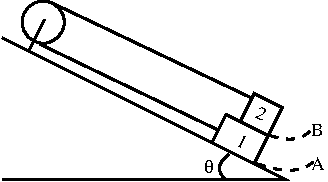

Şekilde gösterildiği gibi $m_1$ ve $m_2$ kütleleri bir iple, $\theta$ açılı bir eğik düzlem üzerinde birbirlerine bağlanmışlardır. 1 kütlesi ile eğik düzlem arasındaki sürtünme katsayısı $\mu_A$; kütlelerin kendi aralarındaki sürtünme katsayısı ise $\mu_B$ ile verilmiştir.

|Verilenler ------  | --------------------- | ----------------------   |
|:---|:--- |:--- |
|$m_1 = 8.6\text{ kg}$|$\mu_A = 0.35$ |$\theta = 38^o$ |
|$m_2 = 1.3\text{ kg}$|$\mu_B = 0.45$ |$g = 9.81 \textrm{m/s}^2$ |


Makaranın sürtünmesiz, ipin kütlesinin ihmal edilebilir olduğunu ve ipi boyunun uzayıp kısalmadığını (yani esnek olmadığını) kabul ederek, ipteki gerilmeyi ve kutuların ivmesini hesaplayın.

**Çözüm:**

Bu tür soruları çözmek için öncelikle serbest cisim diyagramını çizmek <u>her zaman için</u> çok iyi bir yoldur (böylelikle gözümüzden kaçan bir şeyler olma riskini en aza indirmiş oluruz). O halde, 1. ve 2. cisimler için serbest cisim diyagramlarını çizelim:

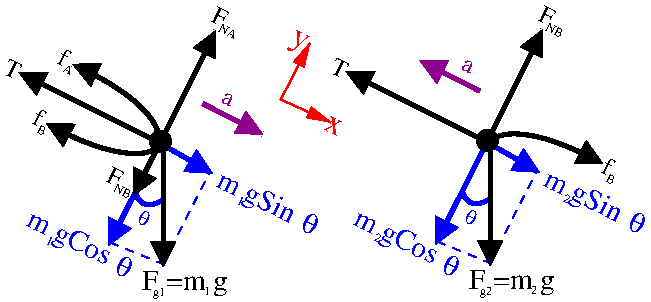

**1\. kütle için,** tanımladığımız x ve y yönlerindeki kuvvetleri yazıp, Newton'ın 2. yasasını kullanırsak:
<hr>
x: $m_{1}g\sin\theta - T - f_A - f_B = m_1 a$ (1)


y: $F_{NA} - F_{NB} - m_1 g \cos\theta = 0$ (2) (bu yönde ivmelenme / hareket olmadığından!(*))


**2\. kütle için:**

x: $f_B + m_2 g \sin\theta - T= m_2 (-a)$ (3) (2. kütle için ivmenin -x yönünde olduğuna dikkat edin!)

y: $F_{NB} - m_2 g \cos\theta = 0$ (4) (bu yönde ivmelenme / hareket olmadığından!(*))

_(*) kütleler eğik düzlemden yukarıya doğru havalanmıyor, onun içine de batmıyorlar!_

(4). denklemden $F_{NB} = m_2 g \cos\theta$ eşitliğini alıp, (2). denklemde $F_{NB}$ gördüğümüz yere yazalım:
\begin{align}\rightarrow F_{NA} &= F_{NB} + m_1 g \cos\theta\\
&=m_2 g \cos\theta + m_1 g \cos\theta = g \cos\theta (m_1 + m_2)\end{align}

$F_{NA}$ ve $F_{NB}$ normal kuvvetlerini bulduğumuza göre, $f_A$ ve $f_B$ sürtünme kuvvetlerini de hesaplayabiliriz:

\begin{align}f_A &= \mu_{A} F_{NA} = \mu_{A} g \cos\theta (m_1 + m_2)\\
f_B &= \mu_{B} F_{NB} = \mu_{B} \left(m_2 g \cos\theta\right)\end{align}

Bu sürtünme kuvvetlerini de (1). denklemlerde yerlerine yerleştirip, $T$ ve $a$'ları bir tarafta topladığımızda:

$$(1): m_{1}g\sin\theta - T - f_A - f_B = m_1 a\\
m_{1}g\sin\theta - T - \left(\mu_{A} g \cos\theta (m_1 + m_2)\right) - \left(\mu_{B} \left(m_2 g \cos\theta\right)\right) = m_1 a\\
\rightarrow T + m_1 a = m_{1}g\sin\theta - \left(\mu_{A} (m_1 + m_2)g \cos\theta \right) - \left(\mu_{B} \left(m_2 g \cos\theta\right)\right)\\
\boxed{T + m_1 a = m_{1}g\sin\theta -g\cos\theta\left(\mu_A m_1 + \mu_A m_2 + \mu_B m_2\right)}
$$

Bu, bizim 2 bilinmeyenli $(T,a)$ 1. denklemimiz. 8)

Şimdi de sürtünme kuvvetlerinin karşılıklarını 3. denkleme yazalım:
$$(3): f_B + m_2 g \sin\theta - T= m_2 (-a)\\
\left(\mu_{B} \left(m_2 g \cos\theta\right)\right) + m_2 g \sin\theta - T= -m_2 a\\
\rightarrow T - m_2 a =  \left(\mu_{B} \left(m_2 g \cos\theta\right)\right) + m_2 g \sin\theta\\
 \boxed{T -m_2 a = m_2 g \left(\mu_B \cos\theta + \sin\theta \right)}
$$

Bu da, 2 bilinmeyenli $(T,a)$ 2. denklemimiz.

Artık elimizde iki bilinmeyenli, iki denklem olduğuna göre, yazdığımız `nn_coz(A,b)` fonksiyonuyla bunu çözebiliriz.

Önce soruda verilen verileri girelim:

In [21]:
m1 = 8.6; m2 = 1.3; muA = 0.35; muB = 0.45; theta = 38; g = 9.81;

Sonrasında denklemlerimizi $A$ katsayılar matrisi ve $b$ sonuç vektörü olarak tanımlayalım:

In [22]:
A = [1  m1
     1 -m2]
b = [m1*g*sind(theta) - g*cosd(theta)*(muA*m1 + muA*m2 + muB*m2)
     m2*g*(muB*cosd(theta) + sind(theta))]

A =

   1.0000   8.6000
   1.0000  -1.3000

b =

   20.633
   12.374



$A$ ve $b$ elimizde olduğuna göre fonksiyonumuza çözdürelim. $A$'nın 1. sütunu $T$'nin, 2. sütunu $a$'nın katsayıları olduğundan ötürü, çözümün 1. satırı $T$, 2. satırı $a$ olacaktır.

In [23]:
x = nn_coz(A,b)

x =

   13.45833
    0.83425



### Sonuç: 
$T = 13.458\textrm{N}$, $a = 0.834\textrm{m/s}^2$

### Özet kod:
Yaptığımız kodu toparlayalım (sizler `nn_coz()` fonksiyonumuzu `nn_coz.m` dosyasına kaydedip ihtiyaç duydukça oradan çağırın, ama ben uygulama notları için tek bir sayfa üzerinde çalıştığımdan bu benim için pek pratik olmuyor, o nedenle fonksiyonu -çok affedersiniz- programın bizzat içinde tanımlıyorum 8P)

In [24]:
# Birbirine bagli ve biri digerinin uzerinde iki cismin
# egik duzlem uzerindeki ivmelerini ve baglandiklari ipteki
# gerilimi cozen program.
#
# (Soruya ornek olarak http://physics.bu.edu/~duffy/py105/Friction.html)
# adresindeki 2. soru alinmistir).
#
# FIZ219 - Bilgisayar Programlama Dersi
# Uygulama Notları: 10
# Gauss eleme yöntemi ile n bilinmeyenli n 
#            -doğrusal- denklemin çözümü örneği
# 
# Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>
# 11/01/2020

clear;

# nn_coz() fonksiyonu:
function x=nn_coz(A,b)
% A(nxn) katsayılar matrisi ve b(nx1) cozum vektoru 
% seklinde verilen n bagimsiz dogrusal denklem 
% takimini cozer.
%
% Sonuc olarak x cozum vektorunu dondurur. (A.x = b)
%
% FIZ219 - Bilgisayar Programlama Dersi, 10. Ders Notu Eki
% Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>
% 11 / 01 / 2020

M = [A b];

n = rows(M); # Degisken ve denklem sayisi

# Ileriye eleme asamasi:
for eleyen_satir_no = 1:n-1
    for etkilenen_satir_no = eleyen_satir_no+1:n
        M(etkilenen_satir_no,:) = M(etkilenen_satir_no,:) ...
           + M(eleyen_satir_no,:) / M(eleyen_satir_no,eleyen_satir_no)...
           * -M(etkilenen_satir_no,eleyen_satir_no);
    endfor
endfor

# Geriye yerine yerlestirme asamasi:
x = zeros(n,1); # Buldugumuz cozumleri bu dizide tutacagiz

for simdiki_satir_no = n:-1:1
    toplam = 0;
    for i = simdiki_satir_no+1:n
        toplam = toplam + M(simdiki_satir_no,i) * x(i);
    endfor
    x(simdiki_satir_no) = (M(simdiki_satir_no,n+1) - toplam) ...
      / M(simdiki_satir_no,simdiki_satir_no);
endfor
endfunction


# Sorunun verileri:
m1 = 8.6; 
m2 = 1.3;
muA = 0.35; 
muB = 0.45;
theta = 38; 
g = 9.81;

# Bundan sonrasi genel olup, benzer sorular icin sadece
# yukaridaki verilerin degistirilmesi yeterlidir.

# Katsayilar matrisi (1. sutun T; 2. sutun a'nin katsayilari):
A = [1  m1
     1 -m2];

# Sonuclar vektoru:
b = [m1*g*sind(theta) - g*cosd(theta)*(muA*m1 + muA*m2 + muB*m2)
     m2*g*(muB*cosd(theta) + sind(theta))];


x = nn_coz(A,b);

printf("     Ipteki Gerilme: %10.6f N\nKutlelerin ivmeleri: %10.6f m/s^2\n",x(1),x(2));

     Ipteki Gerilme:  13.458325 N
Kutlelerin ivmeleri:   0.834245 m/s^2


Programın girdilerini çeşitli durumlara göre değiştirip, beklediğiniz sonuçları veriyor mu diye bakın. Örneğin: kütlelerin ağırlıkları eşit olsa ($m_1 = m_2$); ya da kütleler birbirine yapışık olsa ($\mu_B = 1$); veya üstteki kütlenin ağırlığı çok ama çok büyük olsa, sıfır olsa...

## 2. Uygulama: Kirchoff Yasası
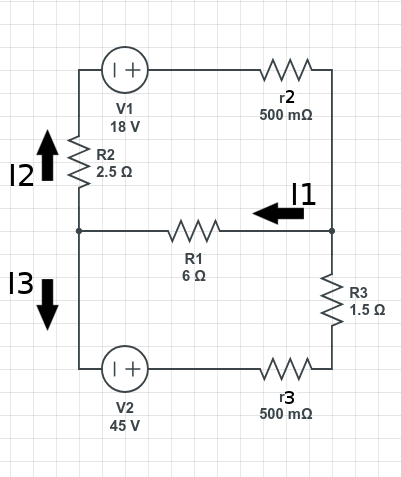

Yukarıdaki şekildeki gibi bir devre verilmiş olsun, bizden $I_1$, $I_2$ ve $I_3$ akımlarını bulmamız istensin.

**Çözüm: (Dikkat Tuzak Var!!!)**

Elimizde 3 adet bilinmeyen var, demek ki bunları çözmek için 3 adet denklem kurmamız gerekmekte. Kirchoff yasasını kullanıp üç çevrim tanımlayalım:

1. çevrimi, üst yarıda, saat yönünde;
2. çevrimi, alt yarıda, saatin tersi yönünde;
3. çevrimi, tüm devrede, saat yönünde

alırsak, elde edeceğimiz denklemler de şunlar olur:

$$1: -I_1 R_1 - I_2 R_2 + V_1 -I_2 r_2 = 0\\
2: -I_1 R_1 + V_2 - I_3 r_3 - I_3 R_3 = 0\\
3: -I_2 R_2 + V_1 - I_2 r_2 + I_3 R_3 + I_3 r_3 - V_2 = 0$$

Bu denklemleri, bilinmeyenleri ($I_1$, $I_2$ ve $I_3$) bir tarafta, bilinenleri diğer tarafta toplayacak şekilde düzenlersek:

$$I_1 R_1 + I_2 R_2  +I_2 r_2 =  V_1\\
I_1 R_1 +I_3 r_3+I_3 R_3 = V_2\\
I_2 R_2 + I_2 r_2 - I_3 R_3 -  I_3 r_3 = V_1 - V_2$$

Ortak parantezlere de alıp, katsayı formatına getirelim:

$$(R_1)I_1 + (r_2 + R_2)I_2 + (0)I_3 = V_1\\
(R_1)I_1 +(0)I_2 + (r_3 + R_3)I_3=V_2\\
(0)I_1 + (r_2 +R_2)I_2 - (r_3 + R_3)I_3=V_1 - V_2$$

Artık sorumuzu tanımlayıp çözdürebiliriz:

In [25]:
# Verileri girelim:
R1 = 6; R2 = 2.5; R3 = 1.5;
r2 = 500E-3; r3 = 500E-3;
V1 = 18; V2 = 45;

# Katsayilar matrisi:
A = [R1  r2+R2   0
     R1    0   r3+R3
      0  r2+R2 -(r3+R3)]

# Sonuc vektoru:
b = [V1; V2; V1-V2]

x = nn_coz(A,b)

A =

   6   3   0
   6   0   2
   0   3  -2

b =

   18
   45
  -27

    nn_coz at line 33 column 25
x =

   NaN
   NaN
   NaN



**Aaaaaa çözüm patladı!!!** 

Hani n bilinmeyenli n denklemin her zaman için bir çözümü vardı?.. Nerede yanlış yaptık?

Elimizde "n bilinmeyenli n denklem takımı" var, var olmasına ama bunun çözümünün garantisi yok. Çözüm garantisi olan: _n bilinmeyenli n **bağımsız** denklem takımı_. Oysa ki bizim elimizdeki 3 denkleme dikkatli bakacak olursak, 3. denklemi 1. denklemden 2. denklemi çıkartmak sureti ile elde edebileceğimizi görürüz. Bu nedenle 3. denklem bağımsız değil, bilakis 1. ve 2. denkleme bağlı. Yani elimizde aslında 3 denklem değil, 2 denklem var (böyle olabilseydi, tek bir denklemi alır, istediğimiz sayılarla çarpıp, toplayıp, sonsuz tane denklem elde edebilirdik ;).

O halde, elimizde aslında 3 değil de, 2 tane denklem varsa, geriye kalan 3. denklemi nereden bulacağız?

(... Burada biraz durun, yukarı, şemaya bakıp bulmaya çalışın, aşağıya öyle devam edin ...)
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
$I_1$, $I_2$ ve $I_3$'ün buluştuğu düğüm noktasını görüyor musunuz? Ortada direnç, pil, vs. yokken akım kaybedip/oluşturamayacağımız için bir düğüme giren akım miktarı, çıkan akım miktarına eşit olmak zorundadır. Yani:

$$I_1= I_2 + I_3$$ olur. Bunu da 3. denklem olarak gösterirsek:

$$(R_1)I_1 + (r_2 + R_2)I_2 + (0)I_3 = V_1\\
(R_1)I_1 +(0)I_2 + (r_3 + R_3)I_3=V_2\\
I_1 - I_2 - I_3= 0$$

Kodumuzu bu şekilde düzenlersek:

In [26]:
# Verileri girelim:
R1 = 6; R2 = 2.5; R3 = 1.5;
r2 = 500E-3; r3 = 500E-3;
V1 = 18; V2 = 45;

# Katsayilar matrisi:
A = [R1  r2+R2   0
     R1    0   r3+R3
      1   -1     -1]

# Sonuc vektoru:
b = [V1; V2; 0]

x = nn_coz(A,b);

printf("I1: %8.3f A\nI2: %8.3f A\nI3: %8.3f A\n",x);

A =

   6   3   0
   6   0   2
   1  -1  -1

b =

   18
   45
    0

I1:    4.750 A
I2:   -3.500 A
I3:    8.250 A


($I_2$'nin negatif çıkmasının anlamının, gerçekte $I_2$ akımının yönünün bizim seçtiğimiz yönün tersi (yani saati yönünde değil de saat yönünün tersi yönünde) olduğunu biliyorsunuzdur herhalde ;).

# Birkaç ufak not, soru, tavsiye
## Soru(n)
`nn_coz()` fonksiyonuna biraz daha dikkatli bakın. Diyelim ki elimizde 3 bilinmeyenli 3 denklem var (yani `n`=3). Kodda "Geriye yerine yerleştirme aşaması"na zoomlarsak:


<code># Geriye yerine yerlestirme asamasi:
x = zeros(n,1); # Buldugumuz cozumleri bu dizide tutacagiz
</code>
<code>for simdiki_satir_no = n:-1:1
    toplam = 0;
    for i = simdiki_satir_no+1:n
        toplam = toplam + M(simdiki_satir_no,i) * x(i);
    endfor
    x(simdiki_satir_no) = (M(simdiki_satir_no,n+1) - toplam) ...
      / M(simdiki_satir_no,simdiki_satir_no);
endfor</code>

* Burada ilk olarak bulmaya çalıştığımız bütün x'leri 0'a eşitleyerek başlıyoruz. 
* `simdiki_satir_no` n'den, yani 3'den başlıyor.
* `toplam`'ı da sıfırladık
* Gelelim `for...` döngümüze: `i = simdiki_satir_no+1`'den başlıyor, yani 3+1=4'ten (!)
* içeride `toplam`'ı hesaplarken `x(i)` ile bir şeyleri çarpıyoruz ve tam da burada bir sorun yok mu?  
zira `i`'nin değeri 4 ama x dizimiz 3 elemanlı ve normalde x(4)'ü çağırsak hatayla karşılaşırız...  
ama kodumuz sorunsuzca, tıkır tıkır çalışıyor!.. _Gel de çık işin içinden!.._ ;) 8)

## "Bunu yapan komut zaten var" (hem de bir sürü!)
`nn_coz(A,b)` fonksiyonunu güzelce yazdık ama bu tür nxn bilinmeyenli denklemler mühendislikte epey sık karşımıza çıktıkları için Octave'da halihazırda bizim fonksiyonumuzun yaptığı işi yapan birden fazla yöntem var -- hatta uzun uzun yazmayalım diye, doğrudan bu işi yaptıran bir işlem bile tanımlı! Bilgisayarların yanı sıra, tarih boyunca da analitik ve sistematik olarak bu işi halleden bir sürü yöntem geliştirilmiş -- detaylarını _FİZ353 - Sayısal Çözümleme_ dersini alırsanız, orada göreceğinizden ötürü, burada sadece birkaç fonksiyon/metot uygulamasını kısaca gösterip, geçeceğim:

In [27]:
# Gosteri icin Kirchoff problemindeki veriyi kullanalim:
A = [ 6   3   0
      6   0   2
      1  -1  -1]

b = [18; 45; 0]

disp("1. yöntem: linsolve fonksiyonu:");
disp("x = linsolve(A,b)")
x = linsolve(A,b)
disp("--------------")

disp("2. yöntem: iki tarafı da A matrisinin tersi ile çarpmak:");
disp("x = inv(A)*b")
x = inv(A)*b
disp("--------------")

disp("3. yöntem: ters bölme operatörünü kullanmak:");
disp("x = A\b")
x = A\b
disp("--------------")

disp("3. yöntem: mldivide fonksiyonu: (bu '\\' operatörüne eşdeğer)");
disp("x = mldivide(A,b)")
x = mldivide(A,b)
disp("--------------")

A =

   6   3   0
   6   0   2
   1  -1  -1

b =

   18
   45
    0

1. yöntem: linsolve fonksiyonu:
x = linsolve(A,b)
x =

   4.7500
  -3.5000
   8.2500

--------------
2. yöntem: iki tarafı da A matrisinin tersi ile çarpmak:
x = inv(A)*b
x =

   4.7500
  -3.5000
   8.2500

--------------
3. yöntem: ters bölme operatörünü kullanmak:
x = 
x =

   4.7500
  -3.5000
   8.2500

--------------
3. yöntem: mldivide fonksiyonu: (bu '\' operatörüne eşdeğer)
x = mldivide(A,b)
x =

   4.7500
  -3.5000
   8.2500

--------------


## Naif, temiz kalpli, saf Gauss eleme yöntemi
Bu notlarda kullandığımız eleme yönteminin tam ismi aynen bu: Naif Gauss Eleme Yöntemi (_Naïve Gauss Elimination Method_). Böyle _naif_ denmesinin sebebi, birtakım tuzaklara karşı önhazırlıksız olmasından, verilen matrisin sıralanmasından kaynaklı olarak bazı işlemlerinin uzun ve kötü hassasiyetle çıkabiliyor oluşundan kaynaklanıyor. Daha optimize ve kurnaz hali _Gauss-Jordan Eleme Yöntemi_ olarak anılıyor (çok da farklı, kompleks bir şey değil bu arada:, sadece orada satırların sırasını belli bir düzene göre değiştirip, öyle işleme alıyoruz).

## Elimizde gerçekte kaç adet denklem var?
Elektrik devresi sorusunda karşımıza çıktığı üzere, bazen biz n bilinmeyenimiz için n tane bağımsız denklemi kurduğumuzu sanırken, bu denklemlerin bazıları diğerlerini kullanılarak çıkarılabiliyor olabilir, bu da tabii ki bağımsızlığımıza halel getirir. Peki bunu çözümü patlatmadan anlamanın bir yolu var mıdır? Vardır tabii ki de! Matematikte bunu matrisini kademesi ("rank"i) ile gösteriyoruz.

Elektrik devresi örneğimizden devam edersek, ilk tanımladığımız doğrusal denklem takımımızı ele alalım:

$$(R_1)I_1 + (r_2 + R_2)I_2 + (0)I_3 = V_1\\
(R_1)I_1 +(0)I_2 + (r_3 + R_3)I_3=V_2\\
(0)I_1 + (r_2 +R_2)I_2 - (r_3 + R_3)I_3=V1 - V_2$$

Bunu da Octave'a girdiğimizde:


In [28]:
# Verileri girelim:
R1 = 6; R2 = 2.5; R3 = 1.5;
r2 = 500E-3; r3 = 500E-3;
V1 = 18; V2 = 45;

# Katsayilar matrisi:
A1 = [R1  r2+R2   0
     R1    0   r3+R3
      0  r2+R2 -(r3+R3)];

# Sonuc vektoru:
b1 = [V1; V2; V1-V2];

M1 = [A1 b1]

M1 =

    6    3    0   18
    6    0    2   45
    0    3   -2  -27



M1'in aslında 3 değil de, 2 bağımsız denklemden oluştuğunu biliyoruz, bunu da `rank()` fonksiyonu ile doğrulayabiliriz:

In [29]:
rank(M1)

ans =  2


Bir de, sonra kullandığımız, çözümü elde edebildiğimiz denklem setimizin kademesine bakalım:


$$(R_1)I_1 + (r_2 + R_2)I_2 + (0)I_3 = V_1\\
(R_1)I_1 +(0)I_2 + (r_3 + R_3)I_3=V_2\\
I_1 - I_2 - I_3= 0$$

In [30]:
# Verileri girelim:
R1 = 6; R2 = 2.5; R3 = 1.5;
r2 = 500E-3; r3 = 500E-3;
V1 = 18; V2 = 45;

# Katsayilar matrisi:
A2 = [R1  r2+R2   0
     R1    0   r3+R3
      1   -1     -1];

# Sonuc vektoru:
b2 = [V1; V2; 0];

M2 = [A2 b2]

rank(M2)

M2 =

    6    3    0   18
    6    0    2   45
    1   -1   -1    0

ans =  3


...ve işlem tamamdır! 8)